In [7]:
pip install investpy

     ---------------------------------------- 0.0/4.4 MB ? eta -:--:--
     --------------------- ------------------ 2.4/4.4 MB 12.3 MB/s eta 0:00:01
     -------------------------------------- - 4.2/4.4 MB 14.8 MB/s eta 0:00:01
     -------------------------------------- - 4.2/4.4 MB 14.8 MB/s eta 0:00:01
     ---------------------------------------- 4.4/4.4 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481627 sha256=4a3591ef6b1d22147de0dc847c7c7d07f0c47958f7b940a358d74a166028802e
  Stored in directory: c:\users\mdamb\appdata\local\pip\cache\wheels\dd\f4\e0\4807b8928ec08b376e1e1f1e1cc597a747cdd8356c37ee618f
Successfully built investpy
Note: you may need to restart the kernel to use updated packages.


In [13]:
import yfinance as yf
import investpy as invest
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
usd = yf.download('DX-Y.NYB')

[*********************100%***********************]  1 of 1 completed


In [35]:
usd.head()

Price,Close,High,Low,Open,Volume
Ticker,DX-Y.NYB,DX-Y.NYB,DX-Y.NYB,DX-Y.NYB,DX-Y.NYB
Date,,,,,
1971-01-04,120.529999,120.529999,120.529999,120.529999,0
1971-01-05,120.519997,120.519997,120.519997,120.519997,0
1971-01-06,120.489998,120.489998,120.489998,120.489998,0
1971-01-07,120.550003,120.550003,120.550003,120.550003,0
1971-01-08,120.529999,120.529999,120.529999,120.529999,0


In [25]:
gold = yf.download('GC=F')

[*********************100%***********************]  1 of 1 completed


In [39]:
gold.head()

Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,0
2000-08-31,278.299988,278.299988,274.799988,274.799988,0
2000-09-01,277.000000,277.000000,277.000000,277.000000,0
2000-09-05,275.799988,275.799988,275.799988,275.799988,2
2000-09-06,274.200012,274.200012,274.200012,274.200012,0


In [200]:
ir = pd.read_csv('IR.csv')

In [202]:
ir = ir.rename(columns = {'observation_date':'Date','DFEDTARU':'IR'})

In [204]:
ir['Date'] = pd.to_datetime(ir['Date'])

In [206]:
ir.dtypes

Date    datetime64[ns]
IR             float64
dtype: object

In [208]:
ir = ir.set_index('Date')

In [153]:
gold.columns = gold.columns.droplevel(1)
usd.columns = usd.columns.droplevel(1)

In [176]:
usd = usd.loc['2010-01-01':'2020-01-01']
gold = gold.loc['2010-01-01':'2020-01-01']

In [210]:
ir = ir.loc['2010-01-01':'2020-01-01']

In [224]:
ir = ir.iloc[:-1]

In [240]:
x = pd.merge(gold, usd, left_index=True, right_index=True)


In [244]:
x.columns = x.columns.str.replace('_x', '_g').str.replace('_y', '_u')

In [250]:
df = pd.merge(x,ir,left_index=True, right_index=True)

In [266]:
df[['Open_g', 'Open_u']].corr()

,Open_g,Open_u
Open_g,1.000000,-0.531548
Open_u,-0.531548,1.000000


In [270]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [278]:
df[['Open_g', 'Open_u', 'IR']] = sc.fit_transform(df[['Open_g', 'Open_u', 'IR']])

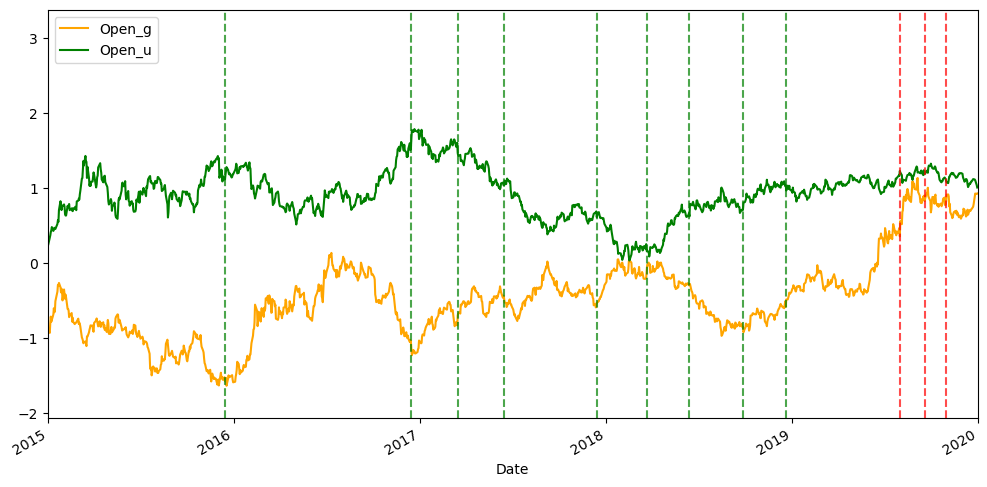

In [312]:

ax = df[['Open_g', 'Open_u']].plot(figsize=(12, 6), xlim=('2015-01-01', '2020-01-01'), color=['orange', 'green'])

# Detect IR changes
changes = df['IR'].ne(df['IR'].shift())  # True where IR changes
change_dates = df.index[changes]

# Loop through change points
for i in range(1, len(change_dates)):
    prev_val = df['IR'].loc[change_dates[i - 1]]
    curr_val = df['IR'].loc[change_dates[i]]

    # Green line for positive change, Red line for negative change
    color = 'green' if curr_val > prev_val else 'red'
    
    plt.axvline(x=change_dates[i], color=color, linestyle='--', alpha=0.7)

plt.show()
